In [9]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from utlis import *


In [10]:
df = pd.read_csv('data.csv')
data = dict()
data['x'] = df['X'].values.reshape(100, 1)
data['t'] = df['T'].values.reshape(100, 1)


In [11]:
RM = RegressionModel()
x = data['x'][:5]
t = data['t'][:5]

mN, SN = RM.posterior_distrib(x, t)


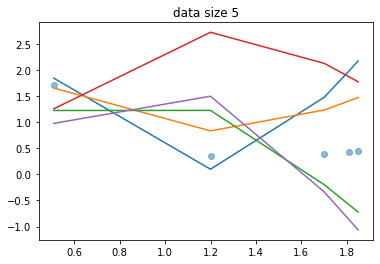

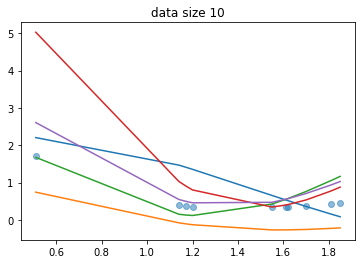

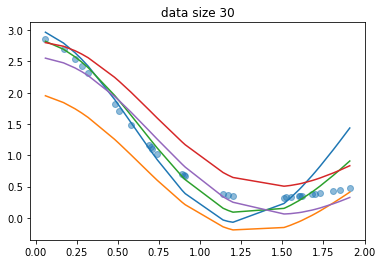

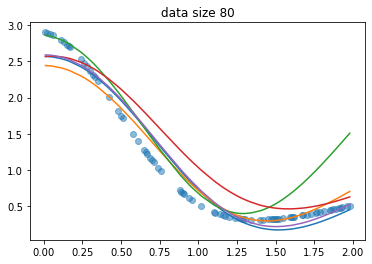

In [12]:
N_list = [5, 10, 30, 80]
# N_list = [10]
for N in N_list:
    RM = RegressionModel()
    x = data['x'][:N]
    t = data['t'][:N]

    mN, SN = RM.posterior_distrib(x, t)
    plt.scatter(x, t, alpha = 0.5)
    
    x = np.array(sorted(x))
    y = RM.predict(RM.basis_function(x) , mN, SN)
    plt.title('data size %d' % N)
    plt.plot(x, y, '-')
    plt.show()
    

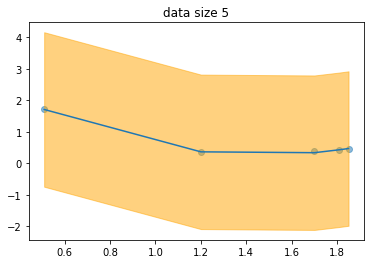

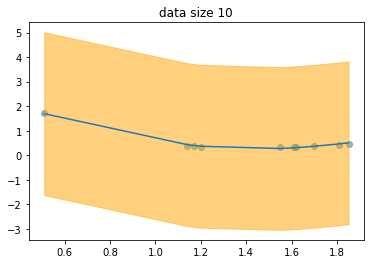

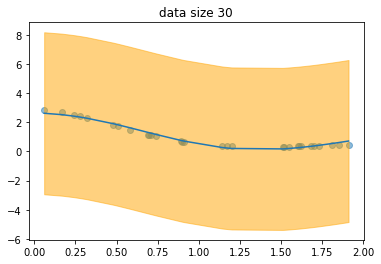

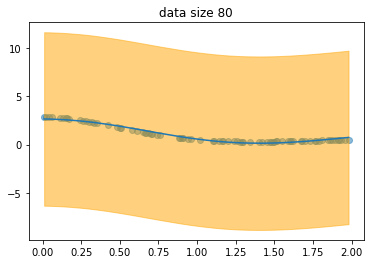

In [14]:
N_list = [5, 10, 30, 80]
# N_list = [10]
for N in N_list:
    RM = RegressionModel()
    x = data['x'][:N]
    t = data['t'][:N]

    mN, SN = RM.posterior_distrib(x, t)
    
    
    x = np.array(sorted(x))
    y = RM.predict(RM.basis_function(x) , mN, SN)

    mean, SD = RM.predict_distrib(x, mN, SN)
    
    plt.scatter(data['x'][:N], t, alpha = 0.5)
    plt.title('data size %d' % N)
    plt.fill_between(x.reshape(len(x)), (mean+SD).reshape(len(y)), (mean-SD).reshape(len(y)), color="orange", alpha=0.5)
    plt.plot(x, mean, '-')
    
    plt.show()